In [37]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tabulate import tabulate


# Load your dataset
data = pd.read_csv("/Users/aameerkhan/Desktop/testdata1.csv")
data = data.drop(['customerID'], axis = 1)
# Convert 'TotalCharges' to numeric, handling errors='coerce' to convert invalid parsing to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Convert columns from object to numeric, handling errors='coerce' to convert invalid parsing to NaN
columns_to_convert = ['StreamingMovies', 'DeviceProtection', 'PaperlessBilling', 'OnlineBackup', 'Contract', 'Partner']
for column in columns_to_convert:
    data[column] = data[column].astype('category').cat.codes

# Convert 'tenure' column to int
data['tenure'] = data['tenure'].astype(int)

# Separate features (X) and target variable (y)
X = data.drop(columns=['Churn'])
y = data['Churn']
# Separate features (X) and target variable (y)
X = data.drop(columns=['Churn'])
y = data['Churn']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Define preprocessing for numerical and categorical data
# (You can customize these transformers based on your dataset)
numerical_transformer = StandardScaler()  # Standardize numerical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')  # One-hot encode categorical features

# Create a ColumnTransformer to apply appropriate preprocessing to numerical and categorical columns separately
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Create a pipeline that includes preprocessing and the classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])

# Train the model
pipeline.fit(X, y)

feature_importances = model.feature_importances_

# Create a dictionary to store feature names without prefixes and their importances
grouped_feature_importances = {}

# Assuming categorical_transformer is your OneHotEncoder after fitting
# Assuming numerical_cols and categorical_cols are pandas Index objects
numerical_cols_list = list(numerical_cols)
categorical_cols_list = list(categorical_cols)

# Concatenate numerical and categorical column names
feature_names = numerical_cols_list + categorical_cols_list
grouped_feature_importances = {}

# Extract feature names without prefixes and group them by original column names
for feature_name, importance in zip(feature_names, feature_importances):
    column_name = feature_name.split('_')[0]  # Get the original column name
    if column_name not in grouped_feature_importances:
        grouped_feature_importances[column_name] = importance
    else:
        # If the original column name already exists, add the importance score to the existing value
        grouped_feature_importances[column_name] += importance
        from tabulate import tabulate

# Prepare data for tabulate
table_data = [[key, f"{value:.4f}"] for key, value in grouped_feature_importances.items()]

# Print the tabulated output
table_headers = ["Feature", "Importance"]
table = tabulate(table_data, headers=table_headers, tablefmt='grid')
print(table)




+-----------------+--------------+
| Feature         |   Importance |
+=================+==============+
| SeniorCitizen   |       0      |
+-----------------+--------------+
| tenure          |       0.1228 |
+-----------------+--------------+
| MonthlyCharges  |       0.1876 |
+-----------------+--------------+
| TotalCharges    |       0.205  |
+-----------------+--------------+
| gender          |       0.0372 |
+-----------------+--------------+
| Dependents      |       0.0278 |
+-----------------+--------------+
| PhoneService    |       0.0276 |
+-----------------+--------------+
| MultipleLines   |       0.0122 |
+-----------------+--------------+
| InternetService |       0.001  |
+-----------------+--------------+
| OnlineSecurity  |       0.0051 |
+-----------------+--------------+
| TechSupport     |       0.0378 |
+-----------------+--------------+
| StreamingTV     |       0.0008 |
+-----------------+--------------+
| PaymentMethod   |       0.0307 |
+-----------------+-

In [38]:
sorted_features = sorted(grouped_feature_importances.items(), key=lambda x: x[1], reverse=True)

# Select the top N features
top_n_features = 8  # You can change this number based on your preference

selected_features = [feature for feature, importance in sorted_features[:top_n_features]]
print("Selected Features:", selected_features)

# Extract selected features from the original dataset
X_selected = data[selected_features]

Selected Features: ['TotalCharges', 'MonthlyCharges', 'tenure', 'TechSupport', 'gender', 'PaymentMethod', 'Dependents', 'PhoneService']


In [39]:
data.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,No,61,Yes,Yes,Fiber optic,No,2,2,No,Yes,2,0,1,Electronic check,83.26,1800.05,No
1,Female,0,1,Yes,13,No,No phone service,DSL,No,0,0,Yes,No,2,1,0,Mailed check,22.06,1545.40,No
2,Female,0,0,Yes,5,Yes,No,No,No internet service,1,1,No internet service,No internet service,1,2,0,Mailed check,20.78,7875.00,No
3,Male,0,1,No,11,Yes,Yes,Fiber optic,No,2,0,No,Yes,0,2,0,Electronic check,112.63,5918.80,No
4,Female,0,1,No,57,Yes,No,DSL,Yes,2,0,Yes,No,0,2,0,Credit card (automatic),84.69,6614.90,No
5,Female,0,1,Yes,66,Yes,No,No,No internet service,1,1,No internet service,No internet service,1,1,0,Credit card (automatic),24.50,3410.00,No
6,Male,0,1,Yes,63,Yes,No,Fiber optic,Yes,2,0,No,No,0,0,0,Electronic check,86.55,451.10,No
7,Male,0,1,Yes,12,Yes,Yes,Fiber optic,No,2,2,No,No,0,0,0,Bank transfer (automatic),65.94,521.80,No
8,Female,0,0,Yes,13,Yes,No,Fiber optic,Yes,2,2,Yes,Yes,2,1,0,Credit card (automatic),76.23,6441.85,No
9,Male,0,1,No,70,Yes,Yes,Fiber optic,Yes,2,2,Yes,No,2,2,0,Electronic check,87.71,2660.20,No


In [40]:
import pandas as pd

# Assuming your original DataFrame is named 'data'
# Create a subset where tenure <= 61
subset = data[data['tenure'] <= 61]

# Number of samples in the node
total_samples = subset.shape[0]

# Number of positive samples (churn = 'No') in this node
positive_samples = subset[subset['Churn'] == 'No'].shape[0]

# Number of negative samples (churn = 'Yes') in this node
negative_samples = subset[subset['Churn'] == 'Yes'].shape[0]

# Print the results
print("Number of Samples in the Node (Total Samples in the Subset):", total_samples)
print("Number of Positive Samples (churn = 'No') in this Node:", positive_samples)
print("Number of Negative Samples (churn = 'Yes') in this Node:", negative_samples)

print("")

# Assuming your original DataFrame is named 'data'
# Create a subset where tenure > 61
subset = data[data['tenure'] > 61]

# Number of samples in the node
total_samples = subset.shape[0]

# Number of positive samples (churn = 'No') in this node
positive_samples = subset[subset['Churn'] == 'No'].shape[0]

# Number of negative samples (churn = 'Yes') in this node
negative_samples = subset[subset['Churn'] == 'Yes'].shape[0]

# Print the results
print("Number of Samples in the Node (Total Samples in the Subset):", total_samples)
print("Number of Positive Samples (churn = 'No') in this Node:", positive_samples)
print("Number of Negative Samples (churn = 'Yes') in this Node:", negative_samples)


Number of Samples in the Node (Total Samples in the Subset): 14
Number of Positive Samples (churn = 'No') in this Node: 12
Number of Negative Samples (churn = 'Yes') in this Node: 2

Number of Samples in the Node (Total Samples in the Subset): 5
Number of Positive Samples (churn = 'No') in this Node: 5
Number of Negative Samples (churn = 'Yes') in this Node: 0


In [41]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X_selected_encoded = pd.get_dummies(X_selected, columns=selected_features)

# Standardize the selected features
scaler = StandardScaler()
X_selected_scaled = scaler.fit_transform(X_selected_encoded)

# Choose the number of clusters (you can adjust this based on your use case)
num_clusters = 3

# Apply K-Means algorithm
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_selected_scaled)

# Add the cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Print the count of samples in each cluster
print(data['Cluster'].value_counts())


import pandas as pd
import numpy as np

# Assuming you have kmeans variable containing the fitted KMeans model

# Get column names from X_selected
column_names = X_selected.columns

# Create a DataFrame with cluster centers
cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_)

# Print the cluster centers
print("Cluster Centers:")
print(cluster_centers_df)


1    12
2     5
0     2
Name: Cluster, dtype: int64
Cluster Centers:
         0         1         2         3         4         5         6   \
0 -0.235702 -0.235702 -0.235702 -0.235702  2.003469 -0.235702 -0.235702   
1  0.137493  0.137493  0.137493  0.137493 -0.235702 -0.235702  0.137493   
2 -0.235702 -0.235702 -0.235702 -0.235702 -0.235702  0.659966 -0.235702   

         7         8         9   ...        55        56        57        58  \
0 -0.235702  2.003469 -0.235702  ...  0.597614 -0.597614  0.938194 -0.433013   
1  0.137493 -0.235702  0.137493  ...  0.029881 -0.029881 -0.204478  0.024056   
2 -0.235702 -0.235702 -0.235702  ... -0.310759  0.310759  0.115470  0.115470   

         59        60        61        62        63        64  
0 -1.054093  0.938194 -1.172604  1.172604  2.915476 -2.915476  
1  0.447989 -0.433013  0.177667 -0.177667 -0.342997  0.342997  
2 -0.653537  0.663953  0.042640 -0.042640 -0.342997  0.342997  

[3 rows x 65 columns]


/Users/aameerkhan/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [42]:
# Assuming 'kmeans' is your fitted KMeans model and 'X' is your feature matrix
clusters = kmeans.predict(X_selected_scaled)
X['Cluster'] = clusters

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Separate features and target variable
X = X_selected_scaled
y = data['Churn']

# Assuming 'X' now includes the 'Cluster' column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40, stratify=y)

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions
predictions = logistic_model.predict(X_test)

# Evaluate the model (you can use metrics like accuracy, precision, recall, etc.)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))
# Print coefficients and intercept (if needed)

print("Intercept:", logistic_model.intercept_)





Accuracy: 83.33%
Intercept: [-4.03421856]


In [45]:
# Check the data types of the columns in X_selected
print(X_selected.dtypes)
print(X_selected.columns)



TotalCharges      float64
MonthlyCharges    float64
tenure              int64
TechSupport        object
gender             object
PaymentMethod      object
Dependents         object
PhoneService       object
dtype: object
Index(['TotalCharges', 'MonthlyCharges', 'tenure', 'TechSupport', 'gender',
       'PaymentMethod', 'Dependents', 'PhoneService'],
      dtype='object')


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming you have defined your features in X and target variable in y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40, stratify=y)

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Predictions
y_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = logistic_model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.8333333333333334


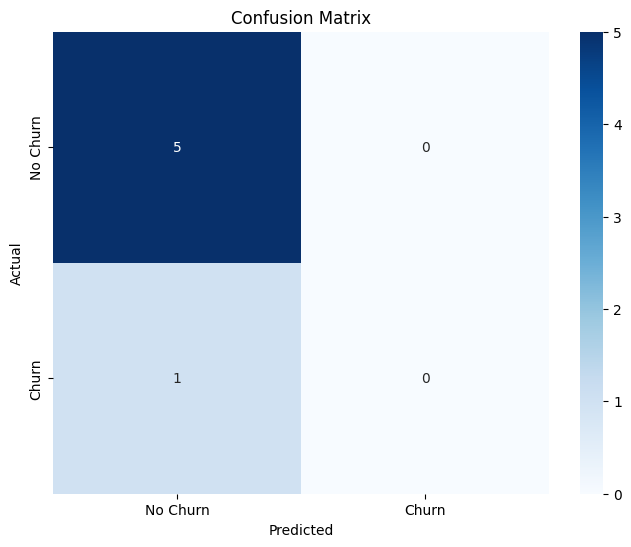

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your logistic regression model and made predictions
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


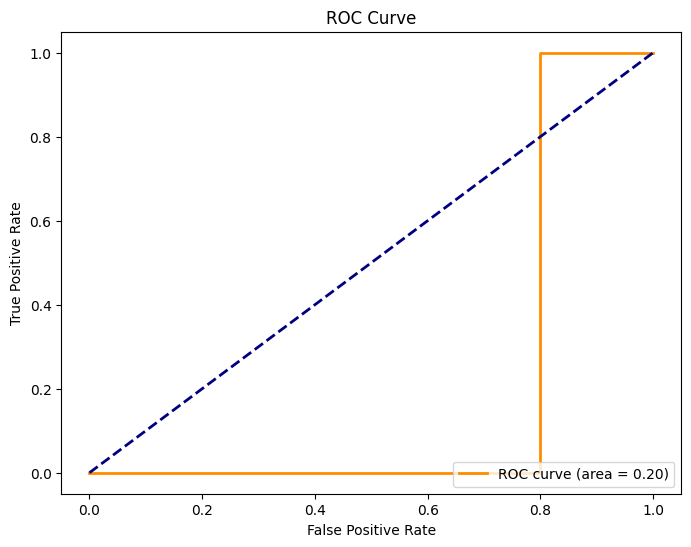

In [50]:
# Convert categorical labels to binary labels
y_test_binary = y_test.map({'No': 0, 'Yes': 1})

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, logistic_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Create a DataFrame from the user input
user_data = pd.DataFrame([user_input])

# Preprocess the user input data (similar to preprocessing done for training data)
# For example: user_data_processed = preprocess(user_data)

# Make predictions using the trained model
prediction = logistic_model.predict(user_data_processed)
print("Predicted Churn Status:", prediction[0])

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

# Assuming data is your DataFrame containing the entire dataset
# Load your dataset
data = pd.read_csv("/Users/aameerkhan/Desktop/testdata1.csv")
data = data.drop(['customerID'], axis = 1)
# Convert 'TotalCharges' to numeric, handling errors='coerce' to convert invalid parsing to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
# Separate features (X) and target variable (y)
X = data.drop(columns=['Churn'])
y = data['Churn']

# Define categorical and numerical features
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                        'PaymentMethod']

numerical_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Specify unique categories for each categorical feature
categories = [X[cat].unique() for cat in categorical_features]

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(categories=categories, handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline for feature selection, K-means clustering, and logistic regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(score_func=f_classif, k=8)),  # Select top 8 features based on ANOVA F-statistic
    ('kmeans', KMeans(n_clusters=3, random_state=42)),  # K-means clustering with 3 clusters
    ('classifier', LogisticRegression(random_state=42))  # Logistic regression classifier
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the pipeline model (including preprocessing, feature selection, clustering, and classification)
pipeline.fit(X_train, y_train)

# Evaluate the model
accuracy = pipeline.score(X_test, y_test)
print("Model Accuracy:", accuracy)

# Make predictions using the trained model
# Assuming user_input is a dictionary containing customer details
user_data =  pd.read_csv("/Users/aameerkhan/Desktop/testdata2.csv")  # Convert user input to DataFrame
prediction = pipeline.predict(user_data)  # Predict churn status for the given customer input

print("Predicted Churn Status:", prediction[0])


Model Accuracy: 0.8333333333333334
Predicted Churn Status: No


/Users/aameerkhan/opt/miniconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0 13] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aameerkhan/opt/miniconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/aameerkhan/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
